In [1]:
# Finding exoplanets with Python + Lightkurve

In [3]:
import lightkurve as lk
import numpy as np

/Users/harry.sadler/Library/Caches/pypoetry/virtualenvs/sci-playground-YEa2YnUl-py3.12/lib/python3.12/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


<Axes: title={'center': 'Target ID: 11904151, Cadence: 345922'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

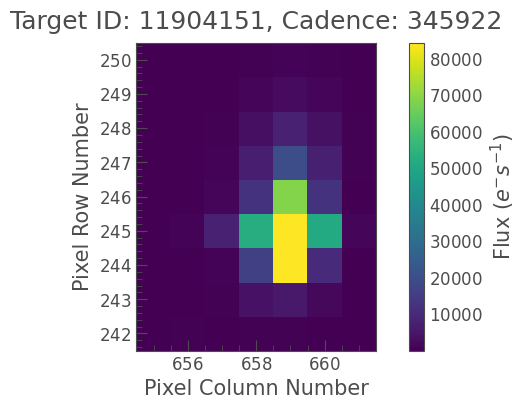

In [7]:
# Download the pixelfile for a given star
# A quarter means a quarter of a year
pixelFile = lk.search_targetpixelfile('kplr011904151', quarter=4).download()
# Show a single snapshot
pixelFile.plot(frame=42)

